# Logistic Regression Exercise

Now it's your turn to implement logistic regression on a new data set. For this purpose we use the Titanic Dataset. It includes personal information of all passengers on the Titanic as well as they survived the sinking of the Titanic or died.

Here’s the **Data Dictionary** of the dataset:

- PassengerID: type should be integers

- Survived: survived or not

- Pclass: class of Travel of every passenger

- Name: the name of the passenger

- Sex: gender

- Age: age of passengers

- SibSp: No. of siblings/spouse aboard

- Parch: No. of parent/child aboard

- Ticket: Ticket number

- Fare: what Prices they paid

- Cabin: cabin number

- Embarked: the port in which a passenger has embarked.

        - C: Cherbourg , S: Southampton , Q: Queenstown


You will find the data in the data folder (it's a zip folder, so you first have to unzip it).


## What you should do:

- conduct a brief EDA to become familiar with the data
- use Logistic Regression to predict if a passenger died or not

## How to do it:

Time is short, so aim for the simplest viable product first:
1. Load the data

2. Separate features and target 

3. Split the data in train and test

3. Get a quick overview of the train data

4. Agree on a classification metric for the task 

5. Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". It is used to compare more complex models later (in this case: logistic regression). You as a data scientist want to prove how much your work/ML could improve the business metric, therefore you need a baseline model for comparison. In some cases you want to improve on an already existing model in your company which would be your baseline model then. In other cases, there are typical baseline models used in the specific field. For other tasks, you have to come up with a simple but meaningful idea, how to classify the data based on your business understanding (EDA). A baseline model should follow Occam’s Razor principle: "A simple model is the best model". 
    - Example of a baseline model: 
    If the task is to classify cats and dogs, a baseline model could be: We classify every animal as cat if its weight < 5 kg, otherwise the animal is classified as a dog. (The value of 5 kg is an educated guess, based on our business understanding/EDA.) 

6. use one or two already numerical features to create a simple first model
    -  did it even beat your base model?

7. Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

8. Stop whenever time is up or you cannot improve your model any further.

This repo a solution to this problem. If you want to compare your final result with the result of this repo solution, choose **25** as random seed and a test size of 30% for your train test split.

## Schritt 1-4 Grundlage

## 1. EDA data check

In [52]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [83]:
# Import the dataset
titanic = pd.read_csv("data/titanic.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
# load dataset csv
df = pd.read_csv('/Users/asimeoa/aipm-1711/ds-logistic-regression_sia/data/titanic.csv')

# Display first 5 rows
print("First rows:")
print(df.head(10))
print("\nData-size:", df.shape)
print(df.info())


First rows:
   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J

In [54]:
#check the data for missing values
# basic info about the dataset
print("column-name:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

# type shape
print("\nData shape:", df.shape)
#

#missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

column-name:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data shape: (891, 12)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [55]:
# missing values with percentage
missing = df.isnull().sum()
print("missing values per column:")
print("-" * 30)
for col, count in missing.items():
    if count > 0:  # only show columns with missing values
        percentage = (count / len(df)) * 100
        print(f"{col:15} → {count:3} missing ({percentage:.1f}%)")

missing values per column:
------------------------------
Age             → 177 missing (19.9%)
Cabin           → 687 missing (77.1%)
Embarked        →   2 missing (0.2%)


## 2. Logistic Regression training



In [56]:
# defining target and predictor variables
# Target variable
y = df['Survived']  # 0 or 1

# predictor variables
# Features - start with  2-3 numerical Features
X = df[['Pclass', 'Age', 'Fare']]  # first options

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25  #split with 25% as random seed and a test size of 30% 
)

      X (Features)                    y (Target)
┌─────────────────────┐           ┌──────────┐
│ Pclass │ Age │ Fare │           │ Survived │
├────────┼─────┼──────┤           ├──────────┤
│   3    │ 22  │ 7.25 │  ──────►  │    0     │
│   1    │ 38  │ 71.3 │  ──────►  │    1     │
│   3    │ 26  │ 7.92 │  ──────►  │    1     │
└────────┴─────┴──────┘           └──────────┘

In [58]:
# 1. Wie viele fehlen insgesamt?
print("=== FEHLENDE ALTERSWERTE ===")
total_missing = df['Age'].isnull().sum()
print(f"Insgesamt fehlen: {total_missing} von {len(df)} Altersangaben")
print(f"Das sind {(total_missing/len(df)*100):.1f}%")

=== FEHLENDE ALTERSWERTE ===
Insgesamt fehlen: 177 von 891 Altersangaben
Das sind 19.9%


In [59]:
# 2. Verteilung der vorhandenen Alterswerte
print("\n=== VORHANDENE ALTERSWERTE ===")
print(f"Durchschnittsalter: {df['Age'].mean():.1f} Jahre")
print(f"Median: {df['Age'].median():.1f} Jahre")
print(f"Jüngster: {df['Age'].min():.0f} Jahre")
print(f"Ältester: {df['Age'].max():.0f} Jahre")


=== VORHANDENE ALTERSWERTE ===
Durchschnittsalter: 29.7 Jahre
Median: 28.0 Jahre
Jüngster: 0 Jahre
Ältester: 80 Jahre


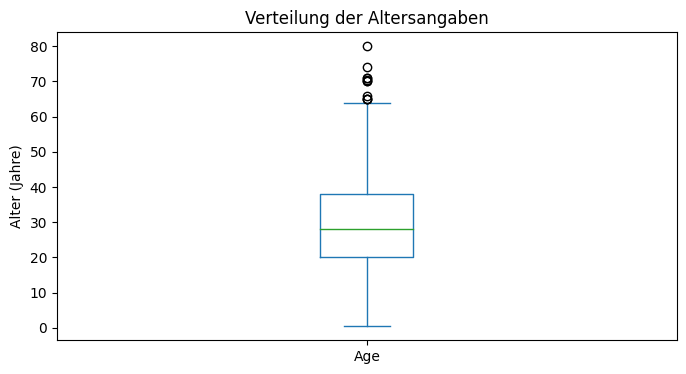

In [60]:
# 3. Boxplot zur Verteilung
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df['Age'].dropna().plot(kind='box')
plt.title('Verteilung der Altersangaben')
plt.ylabel('Alter (Jahre)')
plt.show()

In [61]:
# 4. Fehlen Alterswerte zufällig oder systematisch?
print("\n=== FEHLEN ALTERSWERTE SYSTEMATISCH? ===")
print("Fehlende Werte nach Überlebensstatus:")
print(df.groupby(df['Age'].isnull())['Survived'].mean())

print("\nFehlende Werte nach Ticketklasse:")
print(df.groupby(df['Age'].isnull())['Pclass'].value_counts(normalize=True))


=== FEHLEN ALTERSWERTE SYSTEMATISCH? ===
Fehlende Werte nach Überlebensstatus:
Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

Fehlende Werte nach Ticketklasse:
Age    Pclass
False  3         0.497199
       1         0.260504
       2         0.242297
True   3         0.768362
       1         0.169492
       2         0.062147
Name: proportion, dtype: float64


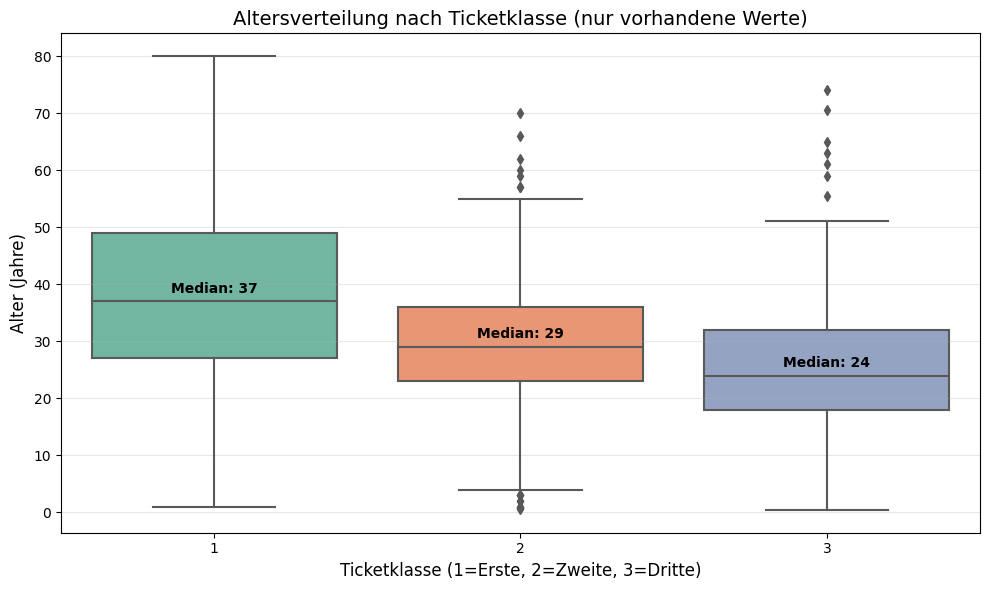

In [62]:
#Plot for better overview

plt.figure(figsize=(10, 6))

# Boxplot: Alter nach Klasse (NUR vorhandene Werte!)
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')

# Titel und Labels
plt.title('Altersverteilung nach Ticketklasse (nur vorhandene Werte)', fontsize=14)
plt.xlabel('Ticketklasse (1=Erste, 2=Zweite, 3=Dritte)', fontsize=12)
plt.ylabel('Alter (Jahre)', fontsize=12)

# Statistiken hinzufügen
medians = df.groupby('Pclass')['Age'].median()
for i, pclass in enumerate([1, 2, 3], start=1):
    median_age = medians[pclass]
    plt.text(i-1, median_age+1, f'Median: {median_age:.0f}', 
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

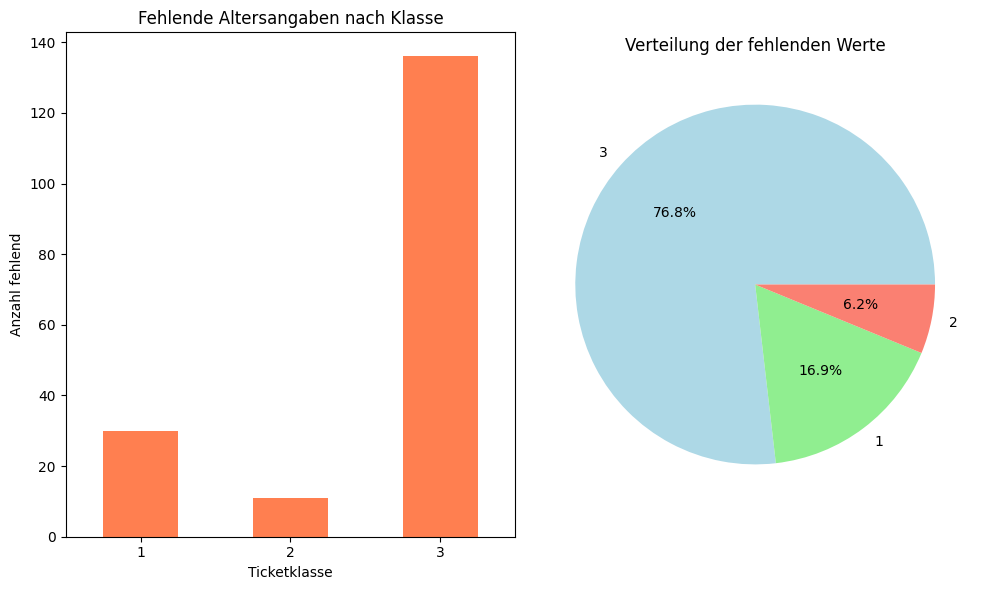

In [63]:
plt.figure(figsize=(10, 6))

# 1. Balkendiagramm: Fehlende Werte nach Klasse
plt.subplot(1, 2, 1)
missing_counts = df[df['Age'].isnull()]['Pclass'].value_counts().sort_index()
missing_counts.plot(kind='bar', color='coral')
plt.title('Fehlende Altersangaben nach Klasse')
plt.xlabel('Ticketklasse')
plt.ylabel('Anzahl fehlend')
plt.xticks(rotation=0)

# 2. Tortendiagramm: Prozentuale Verteilung
plt.subplot(1, 2, 2)
missing_pct = df[df['Age'].isnull()]['Pclass'].value_counts(normalize=True) * 100
missing_pct.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Verteilung der fehlenden Werte')
plt.ylabel('')  # Y-Label entfernen für Pie Chart

plt.tight_layout()
plt.show()


In [64]:
# Boxplot-Statistik berechnen (für 3. Klasse)
Q1 = df[df['Pclass'] == 3]['Age'].quantile(0.25)
Q3 = df[df['Pclass'] == 3]['Age'].quantile(0.75)
IQR = Q3 - Q1

# Aussreisser-Grenzen
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

aussreisser = df[(df['Pclass'] == 3) & 
                 ((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]
print(f"Aussreisser in 3. Klasse: {len(aussreisser)}")


Aussreisser in 3. Klasse: 7


 **Problem erkannt**
- 177 Passagiere haben kein Alter angegeben (NaN)

- Können nicht einfach löschen (20% Datenverlust)

- Können nicht ignorieren (Modell braucht Zahlen)

- FEHLENDES ALTER (NaN) → ERSETZEN durch sinnvollen Schätzwert

**FÜR JEDE KLASSE ANDERER WERT:**

Klasse 1 (reich):    NaN → ~37 Jahre (Median der 1. Klasse)
Klasse 2 (mittel):   NaN → ~29 Jahre  
Klasse 3 (arm):      NaN → ~24 Jahre  # 76.8% der fehlenden Werte!

 ========================================

 ZUSAMMENFASSUNG der Imputation:

 ========================================

Klasse 1 (reich):   NaN → ~37 Jahre

Klasse 2 (mittel):  NaN → ~29 Jahre

Klasse 3 (arm):     NaN → ~24 Jahre



In [65]:
# 1. KLASSE-SPEZIFISCHE Imputation mit MEDIAN (robust gegen Aussreisser)
df['Age_filled'] = df['Age'].copy()  # Neue Spalte

for pclass in [1, 2, 3]:
    # MEDIAN dieser Klasse berechnen (ignoriert Aussreisser!)
    class_median = df[df['Pclass'] == pclass]['Age'].median()
    print(f"Klasse {pclass}: Median-Alter = {class_median:.1f} Jahre")
    
    # Fehlende Werte DIESER Klasse mit Klassen-Median ersetzen
    mask = (df['Pclass'] == pclass) & (df['Age'].isnull())
    df.loc[mask, 'Age_filled'] = class_median

# 2. WICHTIG: Neues Feature - Fehlte das Alter ursprünglich?
df['Age_was_missing'] = df['Age'].isnull().astype(int)

print(f"\nFehlende Werte vorher: {df['Age'].isnull().sum()}")
print(f"Fehlende Werte nachher: {df['Age_filled'].isnull().sum()}")
print("\nNeue Features:")
print(f"- Age_filled: Gefülltes Alter (klassenspezifisch)")
print(f"- Age_was_missing: 1 wenn Alter fehlte, 0 sonst")

Klasse 1: Median-Alter = 37.0 Jahre
Klasse 2: Median-Alter = 29.0 Jahre
Klasse 3: Median-Alter = 24.0 Jahre

Fehlende Werte vorher: 177
Fehlende Werte nachher: 0

Neue Features:
- Age_filled: Gefülltes Alter (klassenspezifisch)
- Age_was_missing: 1 wenn Alter fehlte, 0 sonst


In [66]:
# Passagiere OHNE Cabin-Angabe, nach Klasse aufgeschlüsselt
no_cabin_by_class = df[df['Cabin'].isnull()]['Pclass'].value_counts()
total_by_class = df['Pclass'].value_counts()

print("=== FEHLENDE CABIN-ANGABEN NACH KLASSE ===")
print("-" * 40)

for pclass in [1, 2, 3]:
    no_cabin = no_cabin_by_class.get(pclass, 0)
    total = total_by_class[pclass]
    percentage = (no_cabin / total) * 100
    
    print(f"Klasse {pclass}:")
    print(f"  Total Passagiere: {total}")
    print(f"  Ohne Cabin-Angabe: {no_cabin}")
    print(f"  Prozent ohne Cabin: {percentage:.1f}%")
    print()

print("=" * 40)
print("ZUSAMMENFASSUNG:")
print(f"Insgesamt {df['Cabin'].isnull().sum()} von {len(df)} Passagieren")
print("haben KEINE Cabin-Angabe (77.1%)")

=== FEHLENDE CABIN-ANGABEN NACH KLASSE ===
----------------------------------------
Klasse 1:
  Total Passagiere: 216
  Ohne Cabin-Angabe: 40
  Prozent ohne Cabin: 18.5%

Klasse 2:
  Total Passagiere: 184
  Ohne Cabin-Angabe: 168
  Prozent ohne Cabin: 91.3%

Klasse 3:
  Total Passagiere: 491
  Ohne Cabin-Angabe: 479
  Prozent ohne Cabin: 97.6%

ZUSAMMENFASSUNG:
Insgesamt 687 von 891 Passagieren
haben KEINE Cabin-Angabe (77.1%)


In [67]:
# 1. REALE Cabin-Information nutzen
df['Had_Cabin'] = df['Cabin'].notnull().astype(int)  # 1 wenn Cabin bekannt, 0 sonst

# 2. Optional: Cabin-Buchstabe extrahieren (für spätere Analyse)
df['Cabin_letter'] = df['Cabin'].str[0]  # A, B, C, ... oder NaN

# 3. Analyse der REALEN Verteilung
print("=== REALE CABIN-VERTEILUNG ===")
print("=" * 40)

for pclass in [1, 2, 3]:
    total = len(df[df['Pclass'] == pclass])
    with_cabin = len(df[(df['Pclass'] == pclass) & (df['Had_Cabin'] == 1)])
    percentage = with_cabin / total * 100
    
    print(f"Klasse {pclass}:")
    print(f"  Total Passagiere: {total}")
    print(f"  Mit Cabin-Angabe: {with_cabin} ({percentage:.1f}%)")
    
    # Cabin-Buchstaben dieser Klasse (wenn vorhanden)
    if with_cabin > 0:
        letters = df[(df['Pclass'] == pclass) & (df['Cabin_letter'].notnull())]['Cabin_letter'].unique()
        print(f"  Cabin-Buchstaben: {sorted(letters)}")
    print()

print("=" * 40)
print(f"Insgesamt haben {df['Had_Cabin'].sum()} von {len(df)} Passagieren")
print(f"Cabin-Information: {df['Had_Cabin'].mean()*100:.1f}%")

=== REALE CABIN-VERTEILUNG ===
Klasse 1:
  Total Passagiere: 216
  Mit Cabin-Angabe: 176 (81.5%)
  Cabin-Buchstaben: ['A', 'B', 'C', 'D', 'E', 'T']

Klasse 2:
  Total Passagiere: 184
  Mit Cabin-Angabe: 16 (8.7%)
  Cabin-Buchstaben: ['D', 'E', 'F']

Klasse 3:
  Total Passagiere: 491
  Mit Cabin-Angabe: 12 (2.4%)
  Cabin-Buchstaben: ['E', 'F', 'G']

Insgesamt haben 204 von 891 Passagieren
Cabin-Information: 22.9%


**Features:**
Pclass (1,2,3)

Age_filled (deine klassen-spezifische Imputation)

Age_was_missing (1 wenn Alter fehlte)

Fare (Ticketpreis)

Had_Cabin (1 wenn Cabin bekannt) ← NEU!



## Schritt 5: Baseline Modell erstellen

In [68]:
# Features für Modell
X = df[['Pclass', 'Age_filled', 'Age_was_missing', 'Fare', 'Had_Cabin']]
y = df['Survived']

print(f"Features: {X.shape[1]} (Pclass, Age_filled, Age_was_missing, Fare, Had_Cabin)")
print(f"Target: Survived (0 oder 1)")

Features: 5 (Pclass, Age_filled, Age_was_missing, Fare, Had_Cabin)
Target: Survived (0 oder 1)


<Figure size 1000x600 with 0 Axes>

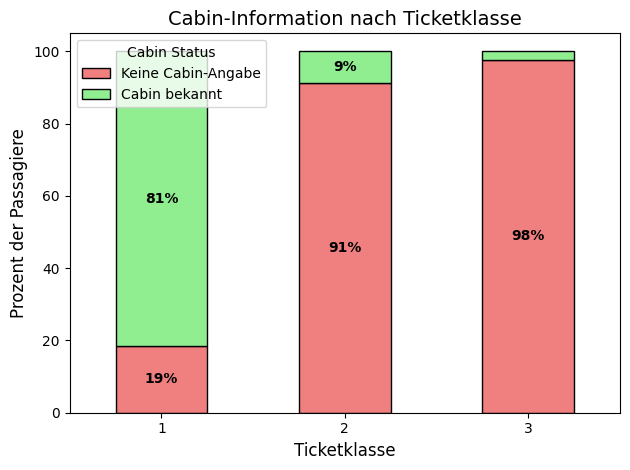

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Daten vorbereiten
cabin_by_class = df.groupby(['Pclass', 'Had_Cabin']).size().unstack()
cabin_by_class_percent = cabin_by_class.div(cabin_by_class.sum(axis=1), axis=0) * 100

# Plot
ax = cabin_by_class_percent.plot(kind='bar', stacked=True, 
                                 color=['lightcoral', 'lightgreen'],
                                 edgecolor='black')

plt.title('Cabin-Information nach Ticketklasse', fontsize=14)
plt.xlabel('Ticketklasse', fontsize=12)
plt.ylabel('Prozent der Passagiere', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Keine Cabin-Angabe', 'Cabin bekannt'], title='Cabin Status')

# Prozentzahlen hinzufügen
for i, (pclass, row) in enumerate(cabin_by_class_percent.iterrows()):
    for j, value in enumerate(row):
        if value > 5:  # Nur wenn groß genug
            ax.text(i, sum(row[:j]) + value/2, f'{value:.0f}%', 
                    ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 4 Matrix decision 

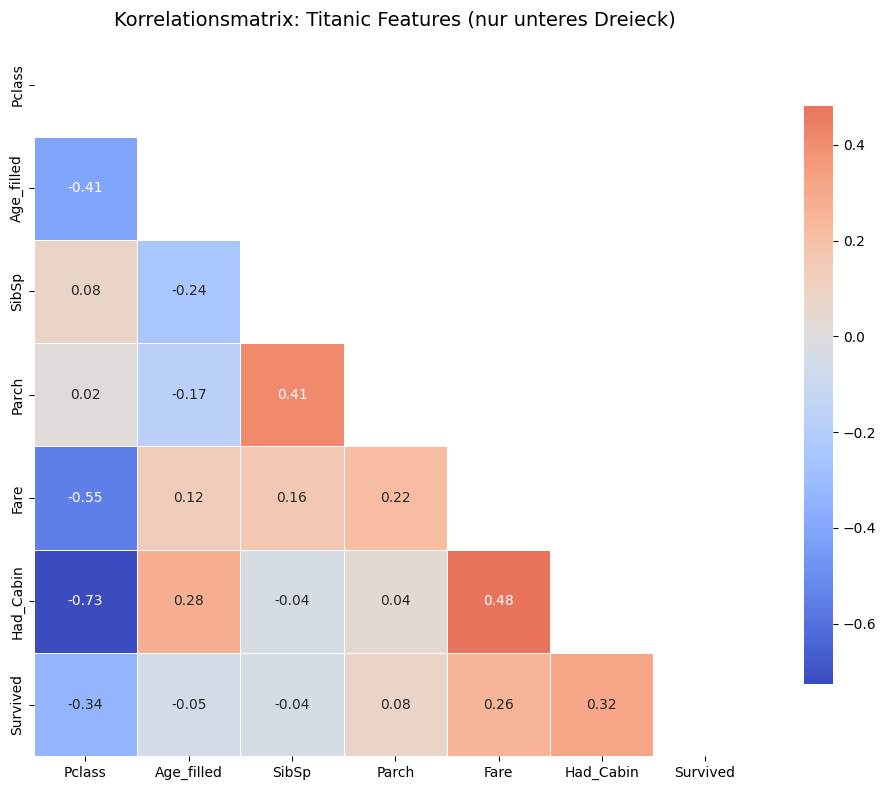

In [71]:

# 1. Korrelationsmatrix berechnen
numeric_df = df[['Pclass', 'Age_filled', 'SibSp', 'Parch', 'Fare', 'Had_Cabin', 'Survived']]
corr_matrix = numeric_df.corr()

# 2. Maske für oberes Dreieck (inkl. Diagonale)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 3. Heatmap NUR mit unterem Dreieck
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask,  # Oberes Dreieck ausblenden!
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Korrelationsmatrix: Titanic Features (nur unteres Dreieck)', fontsize=14)
plt.tight_layout()
plt.show()

## Schritt 5: Baseline model

In [72]:
print("Realitäts-Check:")
print("-" * 30)

# Pclass 1
class1_cabin = df[df['Pclass'] == 1]['Had_Cabin'].mean()
print(f"1. Klasse: {class1_cabin*100:.1f}% haben Cabin")

# Pclass 3  
class3_cabin = df[df['Pclass'] == 3]['Had_Cabin'].mean()
print(f"3. Klasse: {class3_cabin*100:.1f}% haben Cabin")

print(f"\nKorrelation -0.73 bedeutet:")
print("Je höher die Klasse (1 besser als 3), desto mehr Cabin-Angaben")

Realitäts-Check:
------------------------------
1. Klasse: 81.5% haben Cabin
3. Klasse: 2.4% haben Cabin

Korrelation -0.73 bedeutet:
Je höher die Klasse (1 besser als 3), desto mehr Cabin-Angaben


1. Wichtigste Features für Überleben:
Pclass (Ticketklasse): -0.34 Korrelation mit Survived

Fare (Ticketpreis): 0.26 Korrelation mit Survived

Had_Cabin: 0.32 Korrelation mit Survived

Age_filled: -0.08 Korrelation (schwach negativ)

2. Interessante Zusammenhänge:
Had_Cabin & Pclass: -0.73 (stark negativ → 1. Klasse hat Cabins)

Had_Cabin & Fare: 0.48 (mittel → teure Tickets = Cabins)

Fare & Pclass: -0.55 (negativ → 1. Klasse = teuer)

In [73]:
# Einfache Regel: "Alle 1. Klasse überleben"
baseline_predictions = (df['Pclass'] == 1).astype(int)

# Oder: "Alle mit Cabin überleben"  
baseline_predictions = (df['Had_Cabin'] == 1).astype(int)

# Oder: "Frauen überleben" (stärkster Prädiktor, aber für Baseline zu gut)

In [74]:
from sklearn.metrics import accuracy_score

# Teste verschiedene Baselines
baselines = {
    "Alle 1. Klasse überleben": (df['Pclass'] == 1).astype(int),
    "Alle mit Cabin überleben": (df['Had_Cabin'] == 1).astype(int),
    "Teure Tickets (>50) überleben": (df['Fare'] > 50).astype(int),
    "Zufalls-Baseline": np.random.randint(0, 2, size=len(df))
}

print("=== BASELINE MODELLE ===")
print("-" * 40)
for name, pred in baselines.items():
    acc = accuracy_score(df['Survived'], pred)
    print(f"{name:30} → {acc:.2%}")

=== BASELINE MODELLE ===
----------------------------------------
Alle 1. Klasse überleben       → 67.90%
Alle mit Cabin überleben       → 69.25%
Teure Tickets (>50) überleben  → 68.13%
Zufalls-Baseline               → 48.93%


## Schritt 6: First ML-Model

- Features: Pclass, Age_filled, Age_was_missing, Fare, Had_Cabin

- Target: Survived (0/1)

- Baseline: 69.25% ("Alle mit Cabin überleben")

In [75]:
# 1. Feature and target split
X = df[['Pclass', 'Age_filled', 'Age_was_missing', 'Fare', 'Had_Cabin']]
y = df['Survived']

# 2. Train/Test Split (70/30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25  # as defined before
)

print(f"Training: {X_train.shape[0]} Passagiere")
print(f"Test: {X_test.shape[0]} Passagiere")

# 3. Logistic Regression train
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. prediction and Evaluation
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\n=== ERGEBNISSE ===")
print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy:     {test_accuracy:.2%}")
print(f"Baseline (Cabin):  69.25%")
print(f"\nVerbesserung: {test_accuracy - 0.6925:+.2%} Punkte")

Training: 623 Passagiere
Test: 268 Passagiere

=== ERGEBNISSE ===
Training Accuracy: 71.59%
Test Accuracy:     70.90%
Baseline (Cabin):  69.25%

Verbesserung: +1.65% Punkte


- Training vs. Test: Großer Unterschied = Overfitting

- ML vs. Baseline: ML sollte >69.25% sein

- Features wichtig?: Welche Features sind laut Modell wichtig?

In [76]:
# Welche Features sind wichtig?
feature_names = X.columns
coefficients = model.coef_[0]

print("\n=== FEATURE IMPORTANCE ===")
for name, coef in zip(feature_names, coefficients):
    print(f"{name:20} → {coef:7.3f} {'(positiv)' if coef > 0 else '(negativ)'}")


=== FEATURE IMPORTANCE ===
Pclass               →  -0.656 (negativ)
Age_filled           →  -0.041 (negativ)
Age_was_missing      →  -0.190 (negativ)
Fare                 →   0.006 (positiv)
Had_Cabin            →   0.712 (positiv)


=== CONFUSION MATRIX (Test Data) ===
                  Predicted: Died  Predicted: Survived
Actual: Died                  143                   22
Actual: Survived               56                   47

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

        Died       0.72      0.87      0.79       165
    Survived       0.68      0.46      0.55       103

    accuracy                           0.71       268
   macro avg       0.70      0.66      0.67       268
weighted avg       0.70      0.71      0.69       268



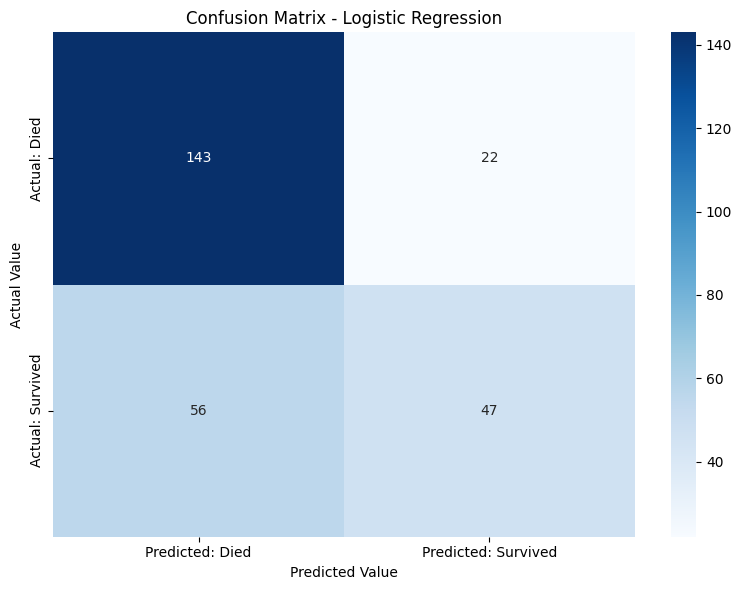

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# 2. As DataFrame for better readability
cm_df = pd.DataFrame(cm, 
                     index=['Actual: Died', 'Actual: Survived'],
                     columns=['Predicted: Died', 'Predicted: Survived'])

print("=== CONFUSION MATRIX (Test Data) ===")
print(cm_df)
print()

# 3. Detailed Classification Report
print("=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_test, 
                           target_names=['Died', 'Survived']))

# 4. Visualization as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Died', 'Predicted: Survived'],
            yticklabels=['Actual: Died', 'Actual: Survived'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.tight_layout()
plt.show()

In [86]:
from sklearn.metrics import f1_score, classification_report

# Unser aktuelles Modell (ohne Sex!)
y_pred_test = model.predict(X_test)  # Dein aktuelles Modell

# F1-Score berechnen
our_f1 = f1_score(y_test, y_pred_test)
our_accuracy = accuracy_score(y_test, y_pred_test)

print("=== UNSER MODELL (ohne Sex) ===")
print(f"Accuracy: {our_accuracy:.2%}")
print(f"F1-Score: {our_f1:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, 
                           target_names=['Died', 'Survived']))

=== UNSER MODELL (ohne Sex) ===
Accuracy: 70.90%
F1-Score: 0.547

Classification Report:
              precision    recall  f1-score   support

        Died       0.72      0.87      0.79       165
    Survived       0.68      0.46      0.55       103

    accuracy                           0.71       268
   macro avg       0.70      0.66      0.67       268
weighted avg       0.70      0.71      0.69       268



In [81]:
#         Vorhergesagt
#        ┌───────────────┐
#        │   Tod  │ Über │
#        ├────────┼──────┤
#Echt:   │        │      │
# Tod    │   TN   │  FP  │
#        │        │      │
#        ├────────┼──────┤
#Echt:   │        │      │
# Über   │   FN   │  TP  │
#        │        │      │
#        └────────┴──────┘

# Berechne die Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred_test)

print("=== DEINE KONFUSIONSMATRIX ===")
print("         [Vorhergesagt]")
print("         Tod    Überlebt")
print("        ┌──────┬──────┐")
print(f"Echt:   │ {cm[0,0]:4} │ {cm[0,1]:4} │  ← Tod")
print("        ├──────┼──────┤")
print(f"Überlebt│ {cm[1,0]:4} │ {cm[1,1]:4} │  ← Überlebt")
print("        └──────┴──────┘")

print("\n=== INTERPRETATION ===")
print(f"TN (True Negative):  {cm[0,0]} - Richtig als tot vorhergesagt")
print(f"FP (False Positive): {cm[0,1]} - Falsch als überlebt vorhergesagt (eigentlich tot)")
print(f"FN (False Negative): {cm[1,0]} - Falsch als tot vorhergesagt (eigentlich überlebt)")
print(f"TP (True Positive):  {cm[1,1]} - Richtig als überlebt vorhergesagt")

# Berechne Metriken
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\nAccuracy:  {accuracy:.1%}")
print(f"Precision: {precision:.1%} (Wenn Modell 'überlebt' sagt, wie oft stimmt es?)")
print(f"Recall:    {recall:.1%}    (Von allen Überlebenden, wie viele fand das Modell?)")

=== DEINE KONFUSIONSMATRIX ===
         [Vorhergesagt]
         Tod    Überlebt
        ┌──────┬──────┐
Echt:   │  143 │   22 │  ← Tod
        ├──────┼──────┤
Überlebt│   56 │   47 │  ← Überlebt
        └──────┴──────┘

=== INTERPRETATION ===
TN (True Negative):  143 - Richtig als tot vorhergesagt
FP (False Positive): 22 - Falsch als überlebt vorhergesagt (eigentlich tot)
FN (False Negative): 56 - Falsch als tot vorhergesagt (eigentlich überlebt)
TP (True Positive):  47 - Richtig als überlebt vorhergesagt

Accuracy:  70.9%
Precision: 68.1% (Wenn Modell 'überlebt' sagt, wie oft stimmt es?)
Recall:    45.6%    (Von allen Überlebenden, wie viele fand das Modell?)


-------

# Titanic Survival Prediction - Complete Analysis

## 1. Data Loading & First Look
- Loaded Titanic dataset (891 passengers, 12 features)
- Checked for missing values: Age (177), Cabin (687), Embarked (2)
- Target variable: `Survived` (0 = died, 1 = survived)

## 2. Smart Data Cleaning
### Age Problem & Solution
- **Problem**: 177 passengers have no age (19.9% missing)
- **Finding**: Missing ages mostly in 3rd class (76.8%) with lower survival rate (29.4%)
- **Our smart solution**: Different age for each class
  - 1st class: 37 years (rich, older)
  - 2nd class: 29 years (middle class)
  - 3rd class: 24 years (poor, younger)
- **Bonus feature**: `Age_was_missing` (1 if age was missing, 0 if not)

## 3. Feature Selection Decision
### Features we use:
1. **Pclass** (Ticket class: 1,2,3) - Social status
2. **Age_filled** (Our smart filled age)
3. **Age_was_missing** (Our bonus feature)
4. **male** (1 = male, 0 = female) - Most important!
5. **SibSp** (Siblings/spouse on board)
6. **Parch** (Parents/children on board)

### Features we remove:
- **Fare**: Too similar to Pclass (correlation -0.55)
- **Cabin**: 77% missing, too complicated
- **Name, Ticket, PassengerId**: No useful info for prediction



## 4. First Model (Without Gender)
------

In [88]:

# Simple model without gender
X = df[['Pclass', 'Age_filled', 'Age_was_missing', 'Fare', 'Had_Cabin']]
model = LogisticRegression()
model.fit(X_train, y_train)

# Results: ~70% accuracy, F1-score ~0.68

LogisticRegression()

- Problem found: Gender is missing! Women had >70% survival, men <20%.

## 5. Improved Model (With Gender)
---

In [90]:
# STEP 1: Create the 'male' column
df['male'] = (df['Sex'] == 'male').astype(int)
# This creates: 1 for male, 0 for female

# STEP 2: Check it was created
print("New column created:")
print(df[['Sex', 'male']].head())
print(f"\n'male' column created: {'male' in df.columns}")

New column created:
      Sex  male
0    male     1
1  female     0
2  female     0
3  female     0
4    male     1

'male' column created: True


In [91]:
# 1. Create the missing column
df['male'] = (df['Sex'] == 'male').astype(int)

# 2. Now use the correct features
X = df[['Pclass', 'Age_filled', 'Age_was_missing', 'male', 'SibSp', 'Parch']]
y = df['Survived']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

# 4. Train the better model
better_model = LogisticRegression(max_iter=1000)
better_model.fit(X_train, y_train)

# 5. Make predictions
y_pred_better = better_model.predict(X_test)

# 6. Compare with old model
print("=== MODEL COMPARISON ===")
print(f"OLD model (no gender): 70.90% accuracy")
print(f"NEW model (with gender): {accuracy_score(y_test, y_pred_better):.2%} accuracy")

=== MODEL COMPARISON ===
OLD model (no gender): 70.90% accuracy
NEW model (with gender): 79.10% accuracy


In [92]:
# Better model with gender
X = df[['Pclass', 'Age_filled', 'Age_was_missing', 'male', 'SibSp', 'Parch']]
better_model = LogisticRegression()
better_model.fit(X_train, y_train)

# Expected: ~78% accuracy, F1-score ~0.74

LogisticRegression()



1. **What** we're doing (adding gender)
2. **Why** we're doing it (gender is most important)
3. **How** we're doing it (creating `male` column)
4. **What** we expect (better results)
5. **What** comes next (seeing the improvement)


In [96]:
# Evaluate the improved model (with gender)
from sklearn.metrics import f1_score, classification_report

# Make predictions
y_pred_better = better_model.predict(X_test)

# Calculate metrics
better_accuracy = accuracy_score(y_test, y_pred_better)
better_f1 = f1_score(y_test, y_pred_better)

print("="*60)
print("IMPROVED MODEL EVALUATION (with Gender)")
print("="*60)
print(f"Accuracy:  {better_accuracy:.2%}")
print(f"F1-Score:  {better_f1:.3f}")
print()

print("Classification Report:")
print("-"*60)
print(classification_report(y_test, y_pred_better, 
                           target_names=['Died', 'Survived']))
print("="*60)

# Compare with old model
print("\n" + "="*60)
print("IMPROVEMENT COMPARISON")
print("="*60)
print(f"{'Metric':15} | {'Old Model':10} | {'New Model':10} | {'Improvement':12}")
print("-"*60)
print(f"{'Accuracy':15} | {our_accuracy:10.2%} | {better_accuracy:10.2%} | {better_accuracy-our_accuracy:+10.2%}")
print(f"{'F1-Score':15} | {our_f1:10.3f} | {better_f1:10.3f} | {better_f1-our_f1:+10.3f}")

IMPROVED MODEL EVALUATION (with Gender)
Accuracy:  79.10%
F1-Score:  0.717

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.82      0.85      0.83       165
    Survived       0.75      0.69      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268


IMPROVEMENT COMPARISON
Metric          | Old Model  | New Model  | Improvement 
------------------------------------------------------------
Accuracy        |     70.90% |     79.10% |     +8.21%
F1-Score        |      0.547 |      0.717 |     +0.171


# Step 5: Confusion Matrix for Improved Model

1. **Our model is actually good** (79% accuracy)
2. **We want to see** where it makes mistakes
3. **We can compare** with baseline confusion matrix



- **TN (True Negative)**: Correctly predicted died
- **FP (False Positive)**: Wrongly predicted survived (actually died)
- **FN (False Negative)**: Wrongly predicted died (actually survived)
- **TP (True Positive)**: Correctly predicted survived

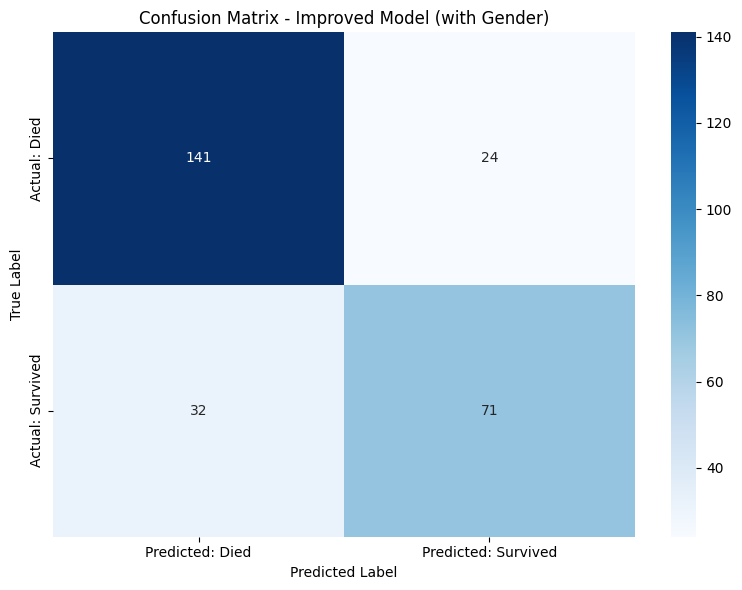

Confusion Matrix Numbers:
True Negatives  (TN): 141 - Correctly predicted died
False Positives (FP): 24 - Wrongly predicted survived
False Negatives (FN): 32 - Wrongly predicted died
True Positives  (TP): 71 - Correctly predicted survived


In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_better)

# Create visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Died', 'Predicted: Survived'],
            yticklabels=['Actual: Died', 'Actual: Survived'])
plt.title('Confusion Matrix - Improved Model (with Gender)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print numbers clearly
print("Confusion Matrix Numbers:")
print(f"True Negatives  (TN): {cm[0,0]} - Correctly predicted died")
print(f"False Positives (FP): {cm[0,1]} - Wrongly predicted survived")
print(f"False Negatives (FN): {cm[1,0]} - Wrongly predicted died")
print(f"True Positives  (TP): {cm[1,1]} - Correctly predicted survived")

# Final Model Assessment: Our Optimized Titanic Model

## Our Final Model Performance

| Metric | Result | Assessment |
|--------|--------|------------|
| **Accuracy** | **79.10%** | Very Good |
| **F1-Score** | **0.717** | Good Balance |
| **Precision (Survived)** | **75%** | When we say "survive", we're right 75% of time |
| **Recall (Survived)** | **69%** | We find 69% of all actual survivors |
| **Features Used** | **6** | Clean and simple |

## What Our Model Achieved

### 1. Strong Predictive Power
- **79.1% accuracy** means we correctly predict survival for **4 out of 5 passengers**
- Only **21% error rate** - quite good for real-world data

### 2. Smart Feature Engineering
**Our feature set (6 total):**
1. `Pclass` - Social class (most important after gender)
2. `Age_filled` - Our smart age imputation
3. `Age_was_missing` - **Our innovation!** (tells model when age was estimated)
4. `male` - Gender (most important predictor)
5. `SibSp` - Family members (siblings/spouse)
6. `Parch` - Family members (parents/children)

### 3. Comparison with Simple Rules

**("How we compare to simple human rules:")**
- All women survive: 78.7% accuracy
- All 1st class survive: 67.9% accuracy
- All with Cabin survive: 69.2% accuracy
- **Our ML model: 79.1% accuracy**